# Quotes
## Sebastian Krauze

In [1]:
# Import modules

from pylab import *
import pickle
import datetime
import gzip

### List of order types: 

* "B" = 1 -- Add buy order
* "S" = 2 -- Add sell order
* "E" = 3 -- Execute outstanding order in part
* "C" = 4 -- Cancel outstanding order in part
* "F" = 5 -- Execute outstanding order in full
* "D" = 6 -- Delete outstanding order in full
* "X" = 7 -- Bulk volume for the cross event
* "T" = 8 -- Execute non-displayed order

In [2]:
# List of stocks and days

tickers=["AAL", "AAPL","ADBE","ADI", "ADP", "ADSK","AKAM","ALXN","AMAT","AMGN",
         "AMZN","ATVI","AVGO","BBBY","BIDU","BIIB","BMRN","CA",  "CELG","CERN",
        "CHKP","CHRW","CHTR","CMCSA","COST","CSCO","CTSH","CTXS","DISCA","DISH",
         "DLTR","EA",  "EBAY","EQIX","ESRX","EXPD","FAST","FB",  "FISV","FOXA",
         "GILD","GOOG","GRMN","HSIC","ILMN","INTC","INTU","ISRG","JD",  "KHC",
         "KLAC","LBTYA","LLTC","LMCA","LRCX","LVNTA","MAR","MAT","MDLZ","MNST",
         "MSFT","MU",  "MYL", "NFLX","NTAP","NVDA","NXPI","ORLY","PAYX","PCAR",
         "PCLN","QCOM","REGN","ROST","SBAC","SBUX","SIRI","SNDK","SPLS","SRCL",
         "STX", "SYMC","TRIP","TSCO","TSLA","TXN", "VIAB","VIP", "VOD", "VRSK",
         "VRTX","WDC", "WFM", "WYNN","XLNX","YHOO"]

days=['07','08','09','10','11']

### Test for one stock and one day

In [3]:
time_0 = datetime.datetime.now()

# Load data

ticker = 'AAL'
day = '07'

print(ticker, day)

time_01 = datetime.datetime.now()

data = genfromtxt(gzip.open('../ITCH_2016/201603%s_%s.csv.gz' % (day,ticker)), 
                  dtype='str', skip_header = 1, delimiter = ',')

time_02 = datetime.datetime.now()

print('Loading data:', time_02 - time_01)

AAL 07
Loading data: 0:00:03.264205


In [4]:
# Lists of times, ids, types, volumes and prices
# List of all the available information available in the data excluding the last two columns

time_03 = datetime.datetime.now()

times_ = array([int(mytime) for mytime in data[:,0]])
ids_ = array([int(myid) for myid in data[:,2]])
types_ = array([1 * (mytype == 'B') + 
                2 * (mytype == 'S') +
                3 * (mytype == 'E') +
                4 * (mytype == 'C') +
                5 * (mytype == 'F') +
                6 * (mytype == 'D') +
                7 * (mytype == 'X') +
                8 * (mytype == 'T') for mytype in data[:,3]])
volumes_ = array([int(myvolume) for myvolume in data[:,4]])
prices_ = array([int(myprice) for myprice in data[:,5]])

ids = ids_[types_<7]
times = times_[types_<7]
types = types_[types_<7]
volumes = volumes_[types_<7]
prices = prices_[types_<7]

time_04 = datetime.datetime.now()

print('Setting lists of data:', time_04 - time_03)

Setting lists of data: 0:00:00.962316


In [5]:
# Reference lists
# Reference lists using the original values or the length of the original lists 

time_05 = datetime.datetime.now()

prices_ref = 1 * prices
types_ref = 0 * types
times_ref = 0 * times
volumes_ref = 0 * types
index_ref= 0 * types
newids = {}
insertnr = {}
hv = 0

# Help lists with the data of the buy orders and sell orders

hv_prices = prices[types < 3]
hv_types = types[types < 3]
hv_times = times[types < 3]
hv_volumes = volumes[types < 3]

time_06 = datetime.datetime.now()

print('Setting help lists:', time_06 - time_05)

Setting help lists: 0:00:00.020895


In [6]:
# Fill the reference lists where the values of 'T' are 'E','C','F','D'

time_07 = datetime.datetime.now()

for iii in range(len(ids)):                             # For the data in the length of the ids list (all data)
    
    if (types[iii] < 3):                                # If the data is a sell or buy order
        
        newids[ids[iii]] = hv                           # Insert in the dictionary newids a key with the valor of the id
                                                        # and the value of hv (a counter)
        insertnr[ids[iii]] = iii                        # Insert in the dictionary insertnr a key with the valor of the id
                                                        # and the value of the for counter
        hv += 1                                         # Increase the value of hv
    
    else:                                               # If the data is not a sell or buy order
        
        prices_ref[iii] = hv_prices[newids[ids[iii]]]   # Fill the values of prices_ref with no prices ('E','C','F','D') 
                                                        # with the price of the order
        types_ref[iii] = hv_types[newids[ids[iii]]]     # Fill the values of types_ref with no  prices ('E','C','F','D') 
                                                        # with the type of the order
        times_ref[iii] = hv_times[newids[ids[iii]]]     # Fill the values of time_ref with no  prices ('E','C','F','D') 
                                                        # with the time of the order
        index_ref[iii] = insertnr[ids[iii]]             # Fill the values of index_ref with no  prices ('E','C','F','D') 
                                                        # with the position of the sell or buy order
        volumes_ref[iii] = hv_volumes[newids[ids[iii]]] # Fill the values of volumes_ref with no  prices ('E','C','F', 
                                                        # 'D') with the volume of the sell or buy order

time_08 = datetime.datetime.now()

print('Filling reference lists:', time_08 - time_07)

Filling reference lists: 0:00:00.594924


In [7]:
# Minimum and maximum trade price

time_09 = datetime.datetime.now()

minP = round(0.9 * (1. * prices_ref[types == 5] / 10000).min(),2) # The minimum price allowed is 0.9 times the price of
                                                                  # the minimum value of all full executed orders.
maxP = round(1.1 * (1. * prices_ref[types == 5] / 10000).max(),2) # The maximum price allowed is 1.1 times the price of
                                                                  # the maximum value of all full executed orders.
valuesP = minP + 0.01 * arange(int((maxP - minP) / 0.01))         # Values between maxP and minP with step of 0.01 cents
maxP = valuesP.max()

time_10 = datetime.datetime.now()

print('Setting prices extremes:', time_10 - time_09)

Setting prices extremes: 0:00:00.001891


In [8]:
# Construct quotes and spread

nAsk = 0 * valuesP      # Sell values started at 0
nAsk[-1] = 1            # Last value of nAsk set to 1
nBid = 0 * valuesP      # Buy values starte at 0
nBid[0] = 1             # First value of nBid set to 1
bestAsk = 10000000.     # Set bestAsk and bestAskOld a high value
bestAskOld = 10000000.
bestBid = 0.            # Set bestBid and bestBidOld a low value
bestBidOld = 0.
bestAsks = []           # Create lists for best asks, bids and times
bestBids = []
bestTimes = []

In [9]:
# Finding the best asks and best bids

time_11 = datetime.datetime.now()

for iii in range(len(ids)):                                    # For the data in the length of the ids list (all data)
    
    # Incoming limit orders
    
    myPriceIndex = int(round(1. * (1.* prices_ref[iii] / 10000 - minP) / 0.01))
    
    bestAskOld = 1 * bestAsk                                   # Initializing bestAksOld and bestBidOld
    bestBidOld = 1 * bestBid
    
    if (myPriceIndex >= 0 and                                  # The price is greater than the minP
        myPriceIndex < len(valuesP)):
        
        if (types[iii] == 2):                                  # If the order is a sell
            
            if (nAsk[myPriceIndex] == 0):
                
                bestAsk = min(bestAsk,valuesP[myPriceIndex])   # The bestAsk is the minimum value between the previous
                                                               # bestAsk and the value in valuesP with id myPriceIndex
                
            nAsk[myPriceIndex] += 1                            # Increase the value of nAsk to 1 (value arrived the book)
            
        if (types[iii] == 1):                                  # If the order is a buy
            
            if (nBid[myPriceIndex] == 0):
                
                bestBid = max(bestBid,valuesP[myPriceIndex])   # The bestBid is the maximum value between the previous
                                                               # bestBid and the value in valuesP with id myPriceIndex
            
            nBid[myPriceIndex] += 1                            # Increase the value of nBid to 1 (value arrived the book)
            
        # limit orders completely leaving
        
        if (types[iii] == 5 or                                 # If the order is a full executed order or
            types[iii] == 6):                                  # If the order is a full delete order
            
            if (types_ref[iii] == 2):                          # If the order is a sell
                
                nAsk[myPriceIndex] -= 1                        # Reduce the value in nAsk to 0 (value left the book)
                
                if (nAsk[myPriceIndex] == 0 and                # If the value is not in the book
                    valuesP[myPriceIndex] == bestAsk):         # If the value is the best ask
                    
                    bestAsk = valuesP[nAsk > 0].min()          # The best ask is the minimum value of the prices that are
                                                               # currently in the order book
                        
            else:
                
                nBid[myPriceIndex] -= 1                        # Reduce the value in nBid to 0 (value left the book)
                
                if (nBid[myPriceIndex] == 0 and                # If the value is not in the book
                    valuesP[myPriceIndex] == bestBid):         # If the value is the best bid
                    
                    bestBid = valuesP[nBid > 0].max()          # The best bid is the maximum value of the prices that are
                                                               # currently in the order book

    if (bestAsk != bestAskOld or                               # If the bestAsk changes or
        bestBid != bestBidOld):                                # If the bestBid changes

        bestTimes.append(times[iii])                           # Append the values of bestTimes, bestAsks and bestBids
        bestAsks.append(bestAsk)                               
        bestBids.append(bestBid)
        bestAskOld = bestAsk
        bestBidOld = bestBid
        
time_12 = datetime.datetime.now()

print('Finding the best asks and bids:', time_12 - time_11)

Finding the best asks and bids: 0:00:02.619266


In [21]:
# Calculating the spread, midpoint and saving data

spread_ = array(bestAsks) - array(bestBids)                # Calculating the spread
timesS = array(bestTimes)                                  # Transforming bestTimes in an array
midpoint_ = 1. * (array(bestAsks) + array(bestBids)) / 2
day_times_ind = (1. * timesS / 3600 / 1000 > 9.5) * (1. * timesS / 3600 / 1000 < 16) > 0 # This line behaves as an or.
                                                           # The two arrays must achieve a condition, in this case, be
                                                           # in the market trade hours
bestAsks = array(bestAsks)[day_times_ind]
bestBids = array(bestBids)[day_times_ind]
spread = spread_[day_times_ind]                            # Spread in the market trade hours
midpoint = midpoint_[day_times_ind]                        # Midpoint in the market trade hours
times_spread = 1. * timesS[day_times_ind] / 3600 / 1000    # Time converted to hours in the market trade hours

#pickle.dump((spread,times_spread,midpoint),open('../spread_201603%s_%s.pickl' % (day,ticker), 'wb'))

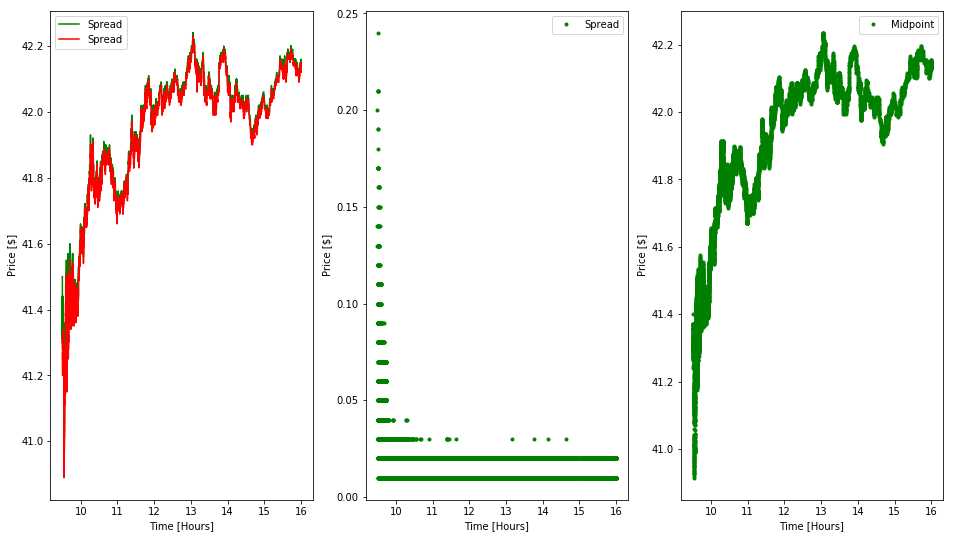

In [23]:
figure(figsize=(16,9))

subplot(131)
plot(times_spread, bestAsks, '-g', label='Spread')
plot(times_spread, bestBids, '-r', label='Spread')
xlabel('Time [Hours]')
ylabel('Price [$]')
legend()

subplot(132)
plot(times_spread, spread, '.g', label='Spread')
xlabel('Time [Hours]')
ylabel('Price [$]')
legend()

subplot(133)
plot(times_spread, midpoint, '.g', label='Midpoint')
xlabel('Time [Hours]')
ylabel('Price [$]')
legend()